In [112]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import distance
from collections import Counter
import math
import seaborn as sns

%matplotlib inline

In [117]:
from Fonctions import *

In [4]:
def liste_bonne_taille(liste):
    liste_vide = []
    for item in liste:
        item = item[len(item)-5:]
        liste_vide.append(item)
    return liste_vide

In [5]:
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/800-849.csv', sep = ",", header = 4)
path = '/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/800-849.csv'

In [6]:
df

,0800_mgh-dd-kar-i_216516,-- gloriosus rex -- </s><s> - gratia2 deus rex -- et -- atque patricius1 -- -- enim ad locus sanctum uenerabilis pro opportunitas,seruus2,deus concedo uel confirmo hic3 nos procul1 dubium ad eternus beatitas pertineo confido igitur nosco sum omnis fidelis
0,0800_passau_224441,meus aliquis deus confero </s><s> trado itaque...,seruus2,ancilla -- ruro campus silua aqua qui2 decursu...
1,0800_pflugk-harttung_236150,-- </s><s> acta sum autem hic3 in uilla public...,seruus2,seruus2 deus omnis archiepiscopus et episcopus...
2,0800_pflugk-harttung_236150,-- </s><s> acta sum autem hic3 in uilla public...,seruus2,deus omnis archiepiscopus et episcopus per tot...
3,0800_pflugk-harttung_236150,ipse2 hic3 -- apostolicus auctoritas priuilegi...,seruus2,ancilla uilla reditus possideo uel deinceps1 a...
4,0800_saintgall_224984,ut aliquis de res meus ad monasterium sanctus1...,seruus2,meus nomen -- cum1 hoba suus in uilla qui2 uoc...
...,...,...,...,...
707,0849_saintgall_225225,solidus2 </s><s> et qui2 in -- et in -- habeo ...,seruus2,unus et postea redimo -- solidus2 </s><s> et s...
708,0849_suecanum_258874,rogo -- subscribo </s><s> signum </s><s> ego -...,seruus2,seruus2 deus -- sanctus1 -- -- -- eternus uita...
709,0849_suecanum_258874,rogo -- subscribo </s><s> signum </s><s> ego -...,seruus2,deus -- sanctus1 -- -- -- eternus uita beatita...
710,9999_montcassin_233318,-- episcopus pro idem2 res mitto </s><s> 76 --...,seruus2,seruus2 deus omnis episcopus et reliquus -- sa...


In [7]:
df.columns = ["indice","pre","lemma","post"]

In [8]:
df2 = df['post'].str.split((' '))
df3 = df['lemma']
for i in range(len(df)):
    string = df2[i][0]
    lemma = df3[i]
    if lemma == "seruus2":
        if string == "seruus2":
            df = df.drop(i, axis = 0)

In [9]:
df = df.drop('lemma', axis = 1)

In [10]:
df

,indice,pre,post
0,0800_passau_224441,meus aliquis deus confero </s><s> trado itaque...,ancilla -- ruro campus silua aqua qui2 decursu...
2,0800_pflugk-harttung_236150,-- </s><s> acta sum autem hic3 in uilla public...,deus omnis archiepiscopus et episcopus per tot...
3,0800_pflugk-harttung_236150,ipse2 hic3 -- apostolicus auctoritas priuilegi...,ancilla uilla reditus possideo uel deinceps1 a...
4,0800_saintgall_224984,ut aliquis de res meus ad monasterium sanctus1...,meus nomen -- cum1 hoba suus in uilla qui2 uoc...
5,0800_saintgall_224984,interim uero1 ego ipse2 dum aduiuo inde soluo ...,reditio sum post2 obitus uero1 meus ad ipse2 m...
...,...,...,...
705,0849_saintgall_225224,meus -- sum suprascriptus res dies uita suus h...,reddo debeo ad suprascriptus locus persoluo </...
706,0849_saintgall_225225,<s> si sospes ad proprius1 non regredior filiu...,unus geldus et postea redimo cum1 -- solidus2 ...
707,0849_saintgall_225225,solidus2 </s><s> et qui2 in -- et in -- habeo ...,unus et postea redimo -- solidus2 </s><s> et s...
709,0849_suecanum_258874,rogo -- subscribo </s><s> signum </s><s> ego -...,deus -- sanctus1 -- -- -- eternus uita beatita...


In [11]:
liste_1 = df['pre'].str.split((' ')).tolist()
liste_2 = df['post'].str.split((' ')).tolist()

In [12]:
def from_csv_to_occurences(path):
    
    import pandas as pd
    
    startindex = 0
    endindex = 0
    num = 0
    for i in path:
        num += 1
        if i == "/":
            startindex = num
        elif i == ".":
            endindex = num-1
    var = path[startindex:endindex]
    
    df = pd.read_csv(path, sep = ",", header = 4, encoding = 'UTF-8')
    df.columns = ["indice","pre","lemma","post"]
    df.drop('lemma', axis = 1)
    
    liste_1 = df['pre'].str.split((' ')).tolist()
    liste_2 = df['post'].str.split((' ')).tolist()
    
    #il faut la fonction liste_bonne_taille
    
    liste1_ok = liste_bonne_taille(liste_1)
    liste2_ok = liste_bonne_taille2(liste_2)
    
    liste_finale = liste1_ok + liste2_ok
    
    #import itertools
    
    liste_lemmes = list(itertools.chain.from_iterable(liste_finale))
    
    
    
    dico = from_list_todic(liste_lemmes)
    
    sortedDict = sorted(dico.items(), key=lambda x: x[1], reverse = True)
    
    df_test = pd.DataFrame.from_dict(sortedDict)
    df_test.columns = ["lemma","occurrences"]
    
    df_test = df_test[:101]
    
    
    
    return (df_test.to_csv(f'final_{var}.csv'))

In [13]:
def csv_tosim(path1,path2):
    
    import pandas as pd
    
    df = pd.read_csv(path1, sep=",", header = 4, nrows = 100)
    df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    df[['lemme','occurrence']]
    
    df = df[["lemme","occurrence"]]
    dictionnaire1 = pd.Series(df.occurrence.values,index=df.lemme).to_dict()
    
    df2 = pd.read_csv(path2, sep=",", header = 1, nrows = 100)
    df2.columns = ['indice','lemme','occurrence']
    df2[['lemme','occurrence']]
    
    dictionnaire2 = pd.Series(df2.occurrence.values,index=df2.lemme).to_dict()
    
    indice_de_similarite = indice_similarite(dictionnaire1,dictionnaire2)
    
    return indice_de_similarite

In [14]:
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/800-849.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/850-899.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/900-949.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/950-999.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/1000-1049.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/1050-1099.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/1100-1149.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/1150-1199.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/1200_1249.csv')
from_csv_to_occurences('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/1250-1299.csv')


In [15]:
neuvieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/850-899.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_800-849.csv')
neuvieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/900-949.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_850-899.csv')
dixieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/950-999.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_900-949.csv')
dixieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1000-1049.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_950-999.csv')
onzieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1050-1099.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1000-1049.csv')
onzieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1100-1149.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1050-1099.csv')
douzieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1150-1199.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1100-1149.csv')
douzieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1150-1199.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1150-1199.csv')
treizieme_siecle1 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1200-1249.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1200_1249.csv')
treizieme_siecle2 = csv_tosim('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1250-1299.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1250-1299.csv')

In [16]:
neuvieme_siecle1

0.2403067129629629

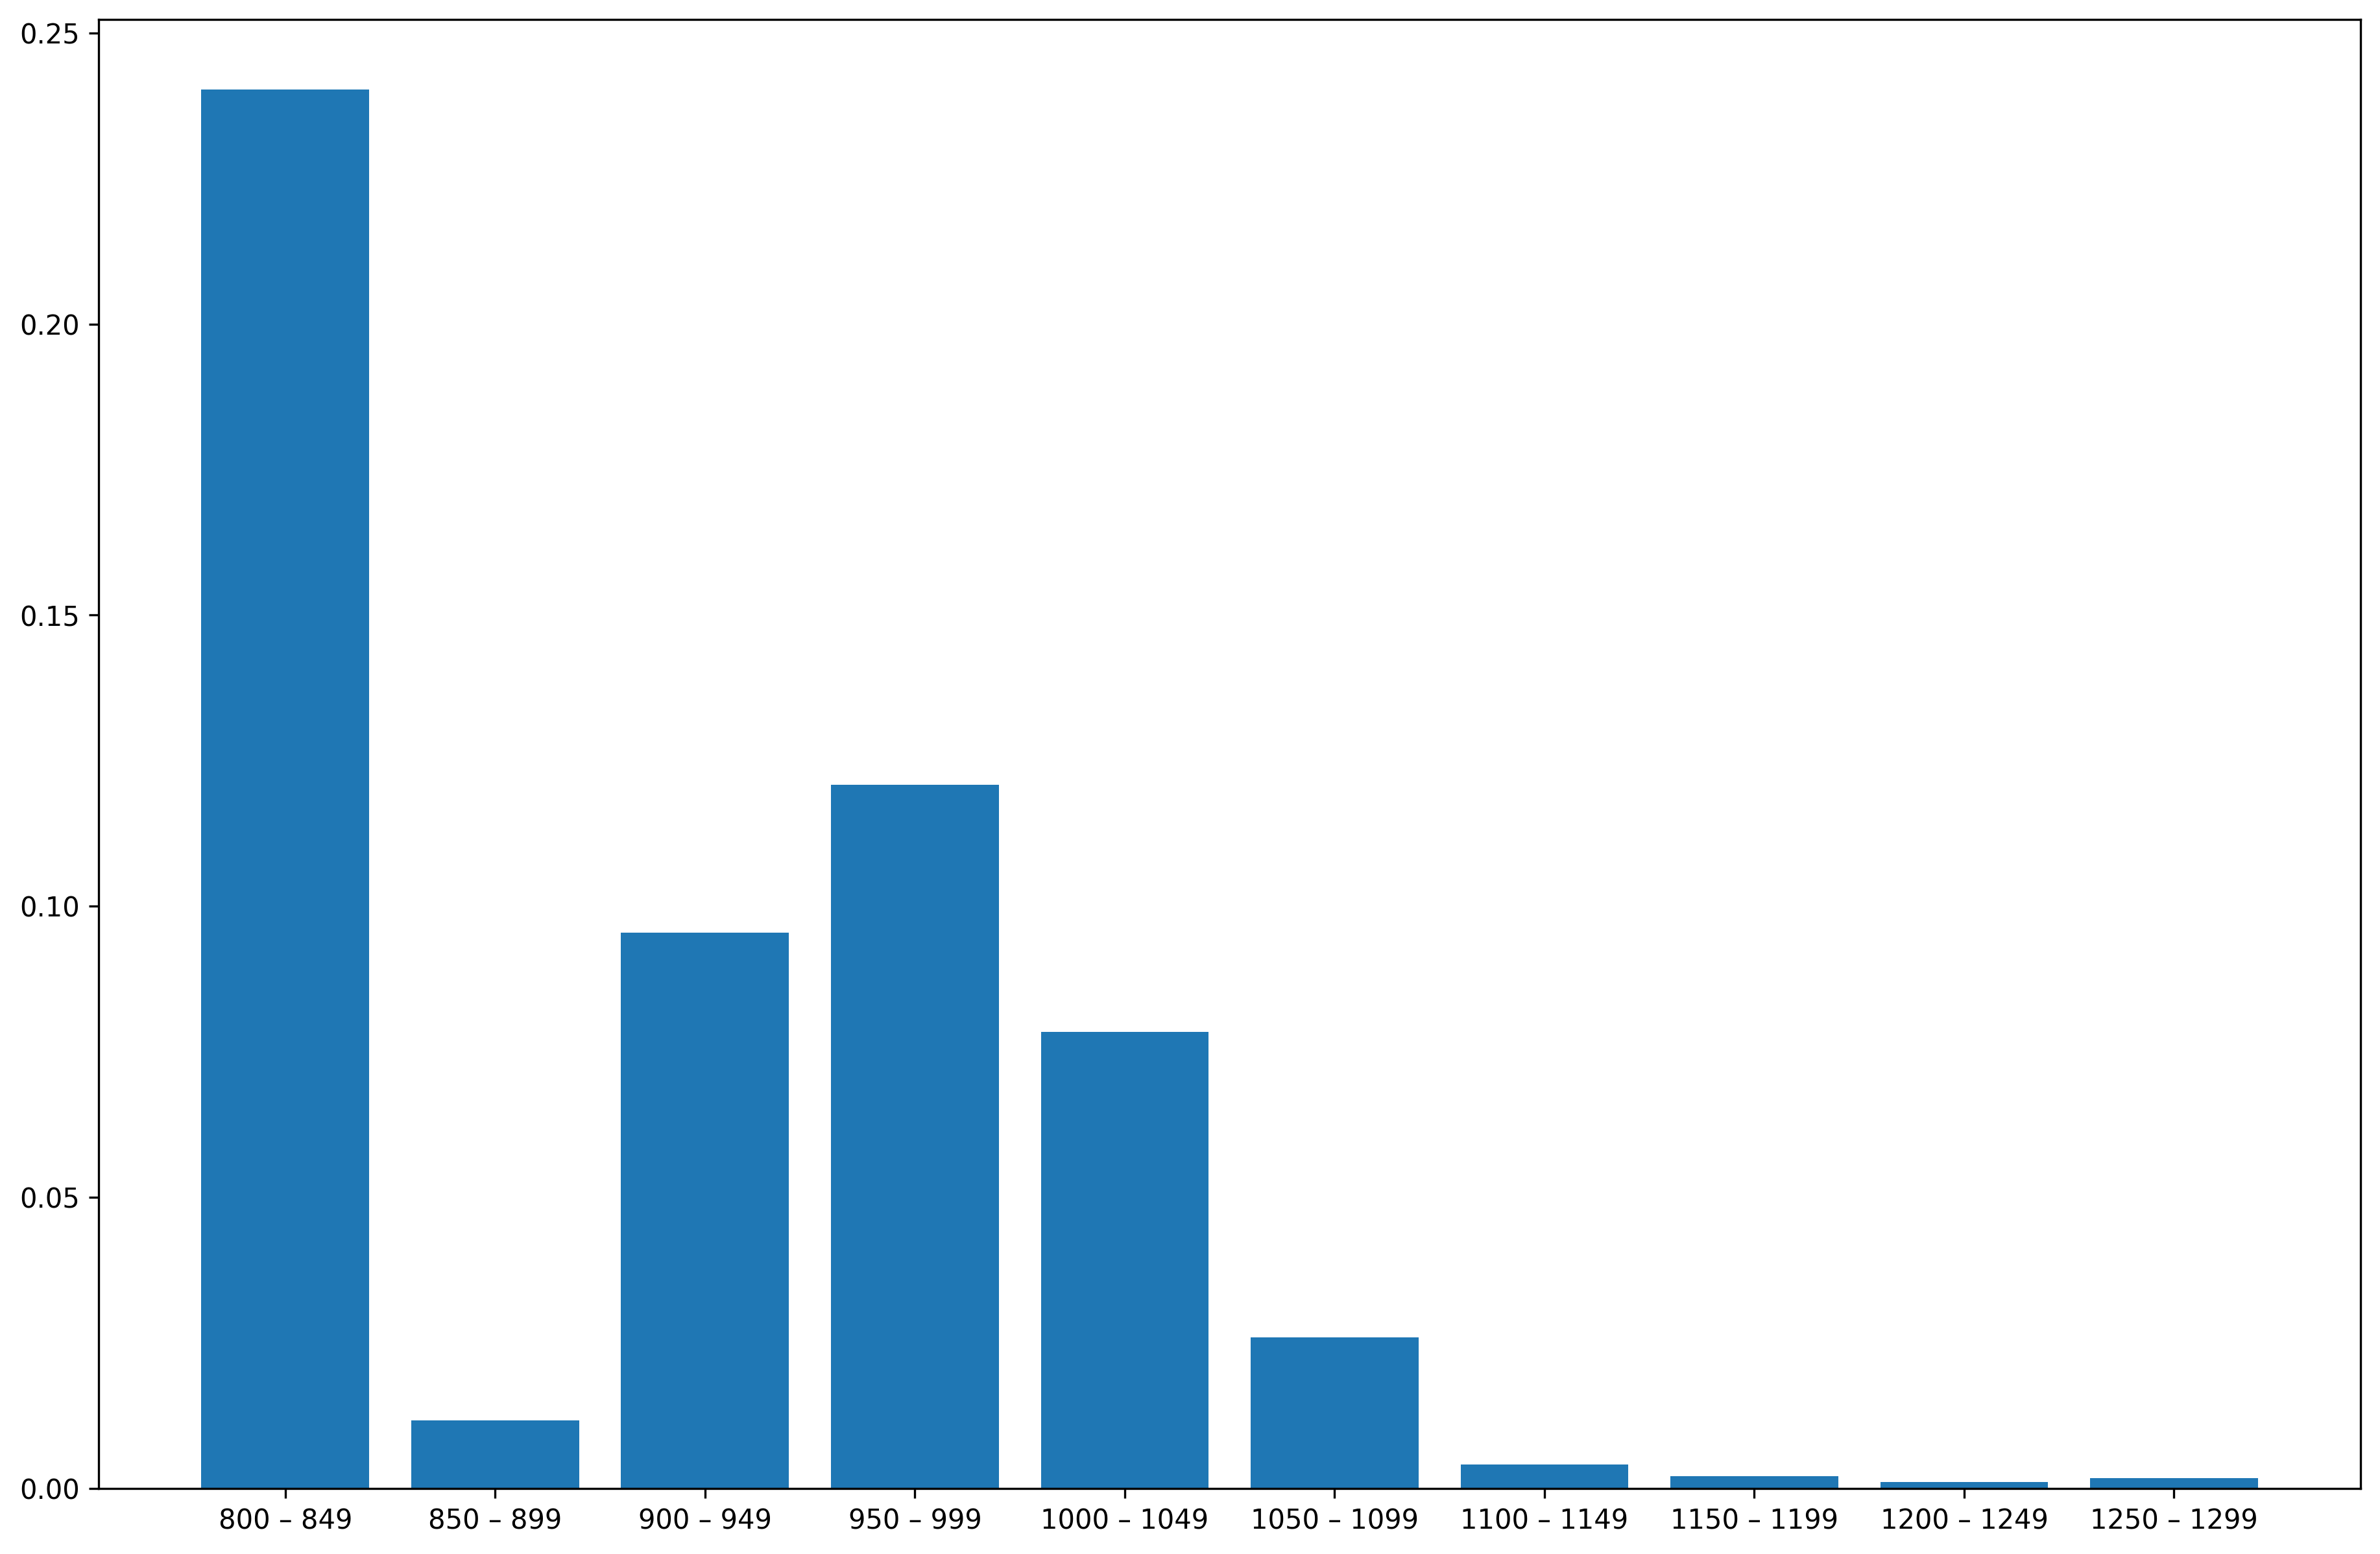

In [17]:
liste_indices = [neuvieme_siecle1,neuvieme_siecle2,dixieme_siecle1,dixieme_siecle2,onzieme_siecle1,onzieme_siecle2,douzieme_siecle1,
                douzieme_siecle2, treizieme_siecle1,treizieme_siecle2]
liste_dates_cooccurrences = ["800 – 849","850 – 899","900 – 949","950 – 999","1000 – 1049",
                             "1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249","1250 – 1299"]

plt.figure(figsize=(15,10), dpi=300)
plt.bar(liste_dates_cooccurrences,liste_indices)
plt.savefig("Indices de similarité_mancipium_seruus.png")

In [18]:
def csv_tojaccard(path1,path2):
    
    df = pd.read_csv(path1, sep=",", header = 4, nrows = 100)
    df.columns = ['lemme','occurrence','apparitions_totales','2','3','4']
    df[['lemme']]
    liste1 = list(df["lemme"])
    
    df2 = pd.read_csv(path2, sep=",", header = 1, nrows = 100)
    df2.columns = ['index','lemme','occurrence']
    df2[['lemme']]
    liste2 = list(df2["lemme"])
    
    jaccard = distance.jaccard(liste1,liste2)
    
    return 1 - jaccard

In [19]:
csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/800-849.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_800-849.csv')


0.2738853503184713

In [20]:
neuvieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/800-849.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_800-849.csv')
neuvieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/850-899.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_850-899.csv')
dixieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/900-949.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_900-949.csv')
dixieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/950-999.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_950-999.csv')
onzieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1000-1049.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1000-1049.csv')
onzieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1050-1099.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1050-1099.csv')
douzieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1100-1149.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1100-1149.csv')
douzieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1150-1199.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1150-1199.csv')
treizieme_siecle1 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1200-1249.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1200_1249.csv')
treizieme_siecle2 = csv_tojaccard('/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/mancipium_cooccurrents/1250-1299.csv','/home/noe/Documents/Master_2/Mémoire/SketchEngineExport/seruus_calcul_cooccurrences/Export_seruus_clean/final_1250-1299.csv')

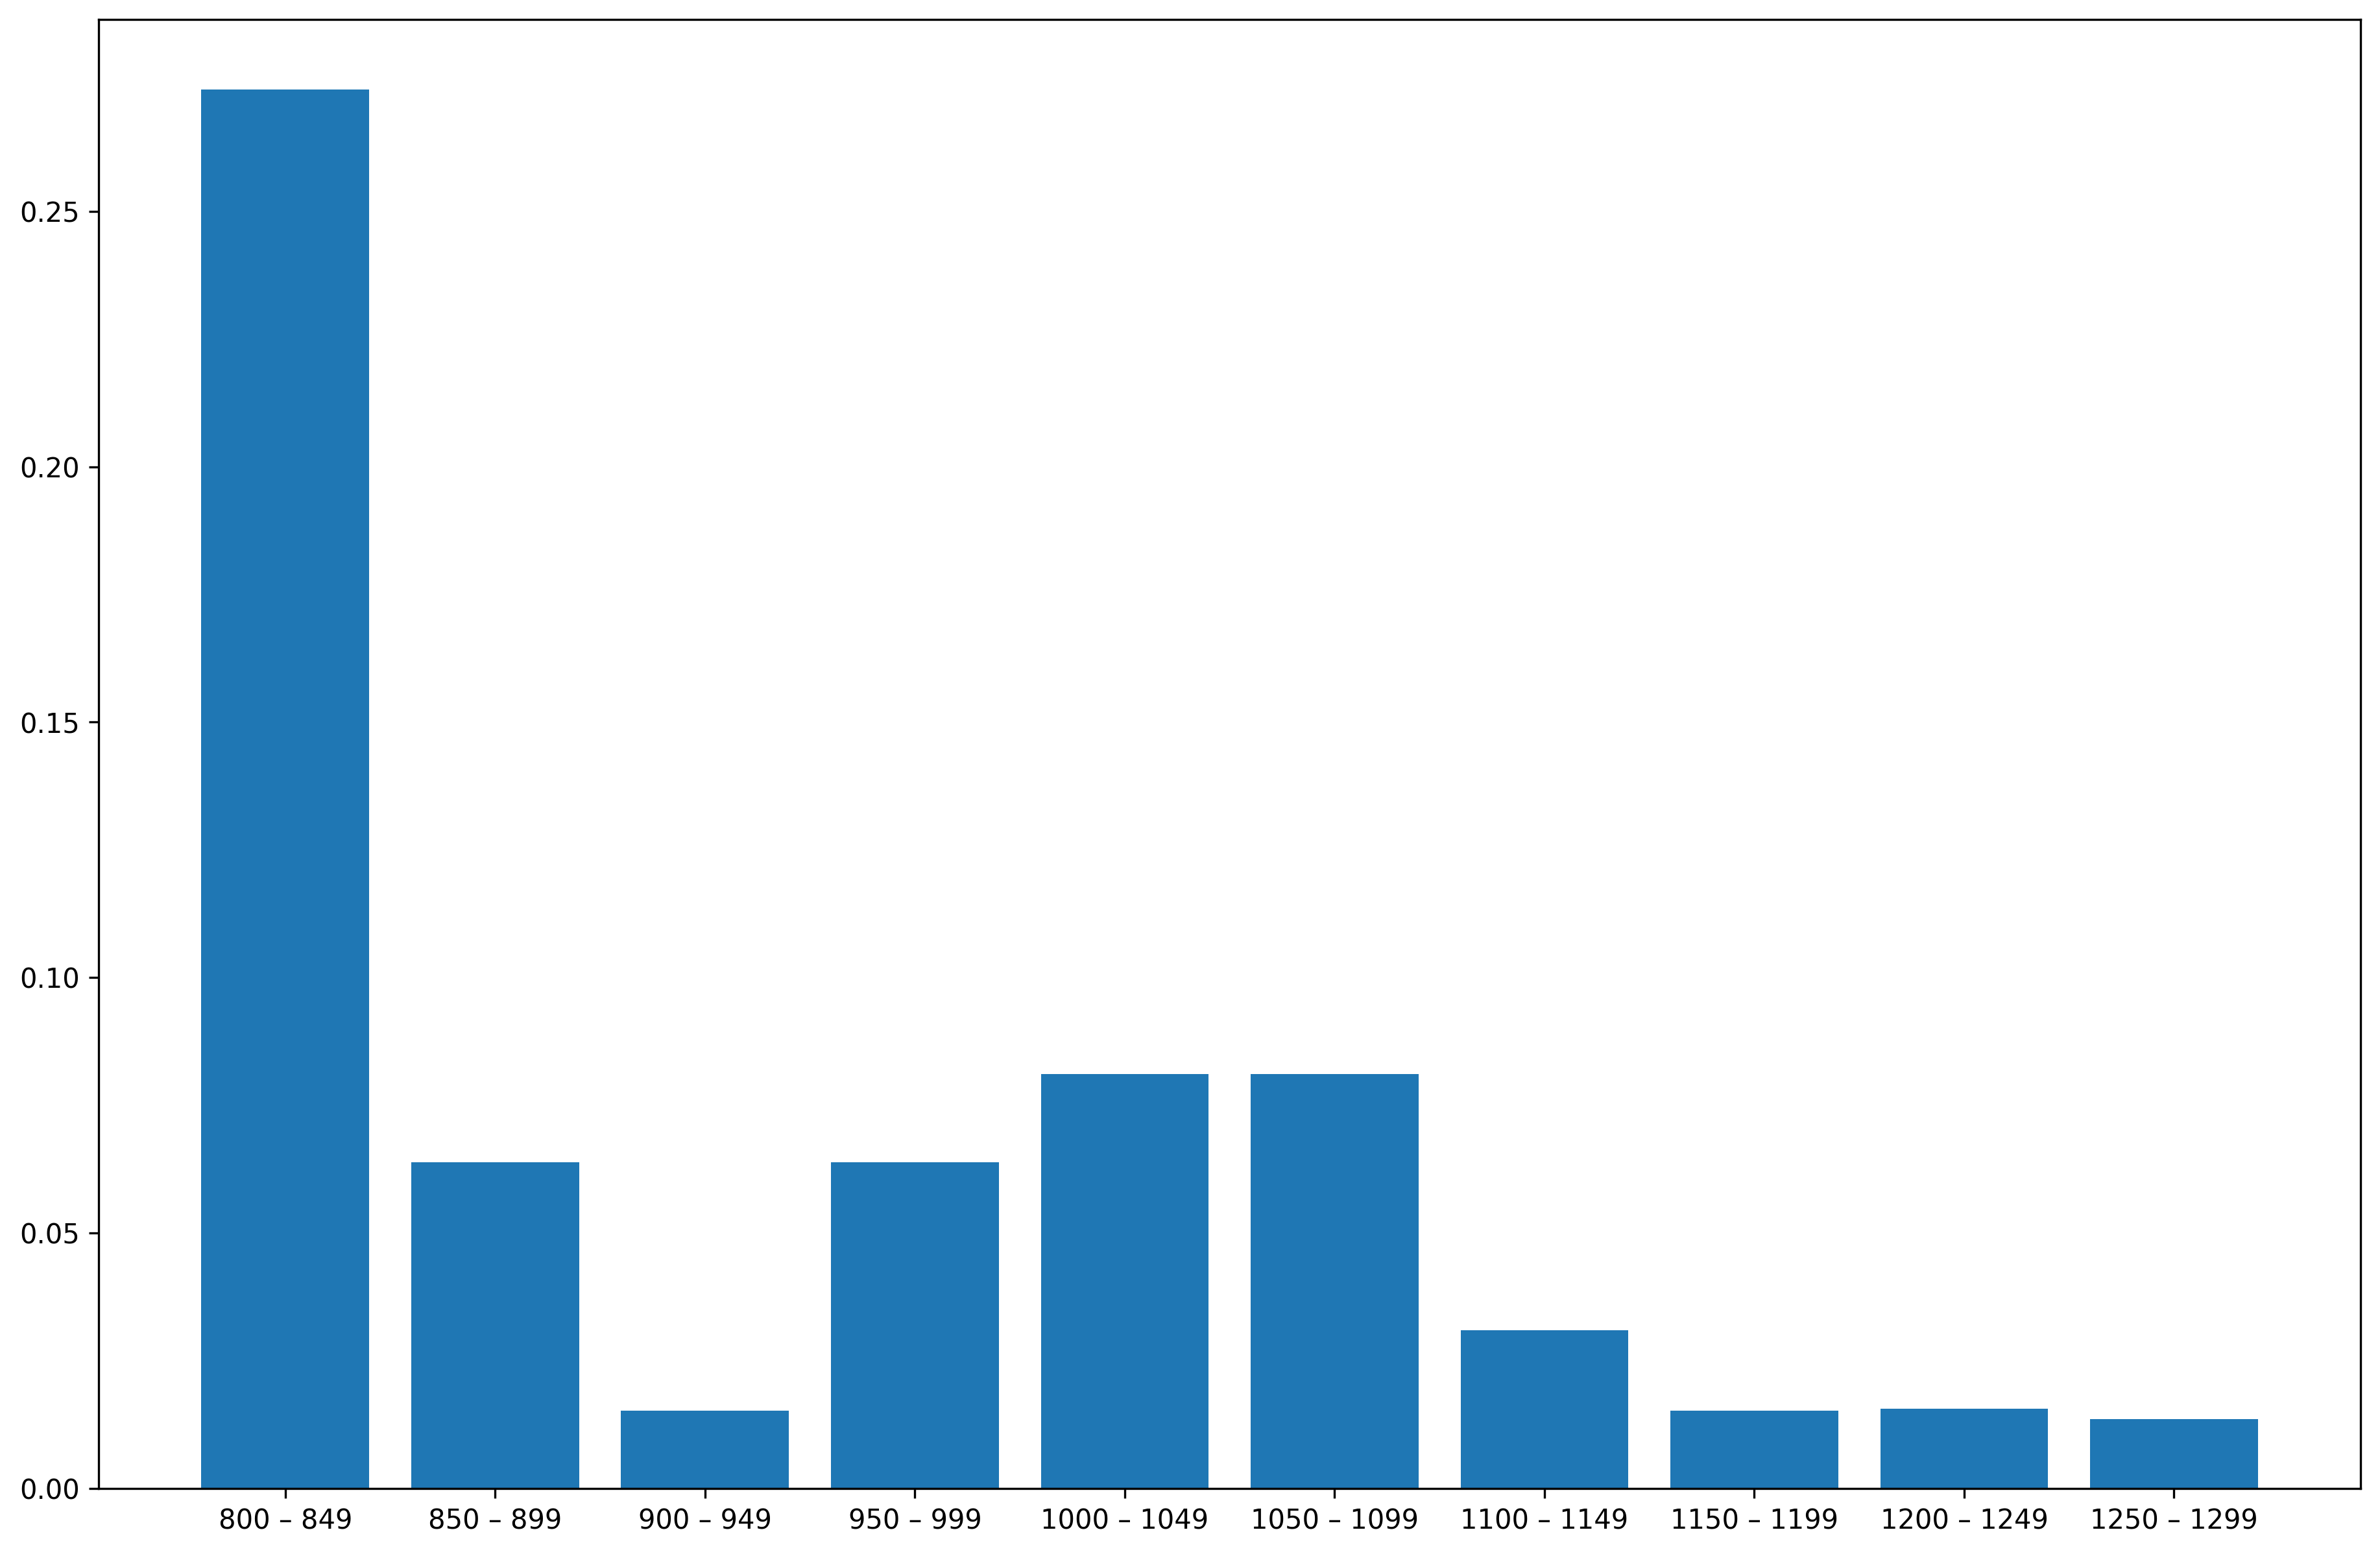

In [21]:
liste_indices = [neuvieme_siecle1,neuvieme_siecle2,dixieme_siecle1,dixieme_siecle2,onzieme_siecle1,onzieme_siecle2,douzieme_siecle1,
                douzieme_siecle2, treizieme_siecle1,treizieme_siecle2]
liste_dates_cooccurrences = ["800 – 849","850 – 899","900 – 949","950 – 999","1000 – 1049",
                             "1050 – 1099","1100 – 1149","1150 – 1199","1200 – 1249","1250 – 1299"]

plt.figure(figsize=(15,10), dpi=300)
plt.bar(liste_dates_cooccurrences,liste_indices)
plt.savefig("Indices de jaccard_mancipium_seruus_clean.png")

In [22]:
df = pd.read_csv('/home/noe/Documents/Master_2/Mémoire/seruus_brut.csv', sep = ',', header = 4, encoding = 'UTF-8')

In [23]:
df.columns = ["indice","1","lemme","2"]
df2 = df['indice'].value_counts()

In [24]:
df2.columns = ['indice','frequency']

In [25]:
#df2.to_csv('fréquence par texte.csv')

In [26]:
df2.describe() #stats de base sur la fréquence de la présence de seruus dans un texte.

count    20884.000000
mean         1.887522
std          1.208138
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        104.000000
Name: indice, dtype: float64

In [27]:
freq = df2.tolist()


In [28]:
list_tuples = Counter(freq).most_common()
result = dict(list_tuples)
result

{2: 15397,
 1: 4443,
 3: 697,
 4: 227,
 5: 39,
 6: 29,
 7: 14,
 10: 8,
 8: 8,
 9: 6,
 32: 2,
 11: 2,
 104: 1,
 52: 1,
 42: 1,
 39: 1,
 37: 1,
 36: 1,
 29: 1,
 24: 1,
 23: 1,
 20: 1,
 14: 1,
 12: 1}

In [29]:
def dico_to_lists(liste):

    newlist = list()
    newlist2 = list()
    for i in liste.keys():
        newlist.append(i)
    for j in liste.values():
        newlist2.append(j)

    plt.figure(figsize=(15,10), dpi=300)
    plt.bar(newlist,newlist2)




In [43]:
from math import log

In [116]:
a = list(result.keys())
b = list(result.values())
c = [log(i,10) for i in b]

In [108]:
df = pd.DataFrame([d]).transpose()
df
#Trouver un moyen d'illustrer 

,0
2,4.187436
1,3.647676
3,2.843233
4,2.356026
5,1.591065
6,1.462398
7,1.146128
10,0.903090
8,0.903090
9,0.778151
